In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [14]:
customers=pd.read_csv('Customers.csv')

In [16]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns



In [18]:
df['SignupDate'] = pd.to_datetime(df['SignupDate'])



In [26]:
region_counts =df['Region'].value_counts()
print(region_counts)



Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


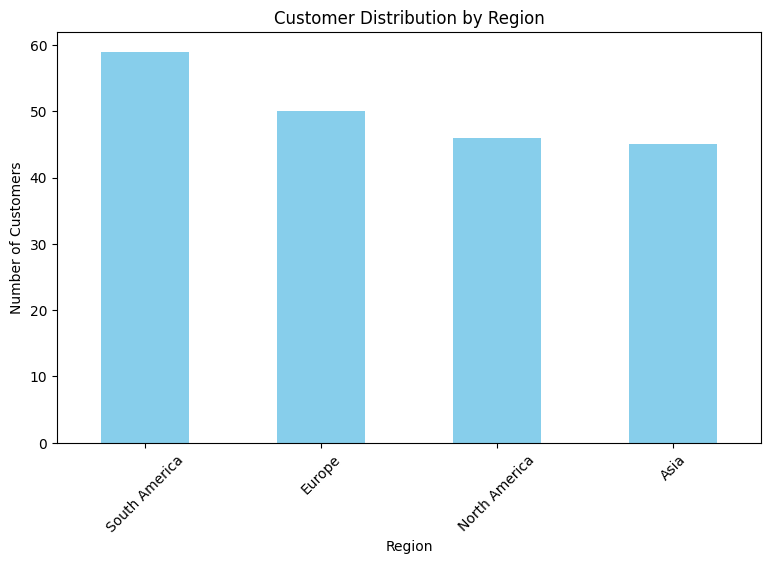

In [29]:
# Convert SignupDate to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Customer Region Distribution
region_counts = customers['Region'].value_counts()

# Signup Date Analysis
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()

# Plotting
plt.figure(figsize=(15, 10))

# Region Distribution
plt.subplot(2, 2, 1)
region_counts.plot(kind='bar', color='skyblue')
plt.title("Customer Distribution by Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

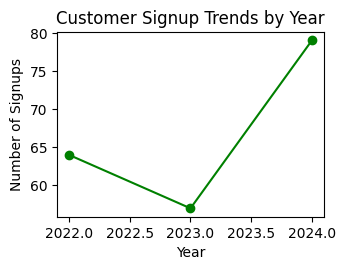

In [34]:
# Signup Trends
plt.subplot(2, 2, 2)
signup_trends.plot(kind='line', marker='o', color='green')
plt.title("Customer Signup Trends by Year")
plt.ylabel("Number of Signups")
plt.xlabel("Year")


plt.tight_layout()
plt.show()

In [37]:
total_customers = customers['CustomerID'].nunique()
print(f"\nTotal number of unique customers: {total_customers}")




Total number of unique customers: 200



Month-wise signup trend (rows=years, columns=months):
SignupMonth  1   2   3   4   5   6   7   8   9   10  11  12
SignupYear                                                 
2022          1   7   8   8   8   5   4   4   6   3   3   7
2023          5   6   8   6   3   3   3   2   4   7   5   5
2024          9   8   4  10   6   4   6   4  11   5  11   1


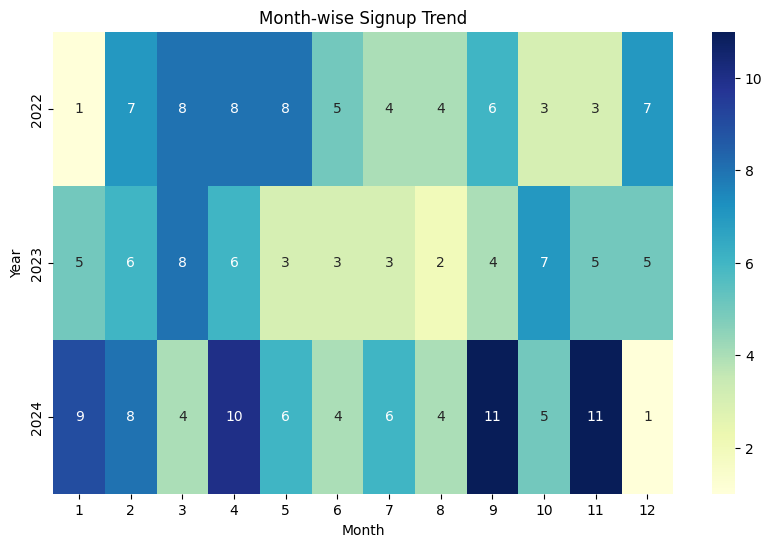

In [43]:
# Ensure the 'SignupYear' and 'SignupMonth' columns are derived from 'SignupDate'
customers['SignupYear'] = customers['SignupDate'].dt.year  # Extract year
customers['SignupMonth'] = customers['SignupDate'].dt.month  # Extract month

# Group data by 'SignupYear' and 'SignupMonth', and fill missing combinations with 0
monthly_signups = customers.groupby(['SignupYear', 'SignupMonth']).size().unstack(fill_value=0)

# Display the monthly signup trends
print("\nMonth-wise signup trend (rows=years, columns=months):")
print(monthly_signups)



plt.figure(figsize=(10, 6))
sns.heatmap(monthly_signups, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Month-wise Signup Trend')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()



Region-wise signup trends over the years (rows=regions, columns=years):
SignupYear     2022  2023  2024
Region                         
Asia             13    16    16
Europe           16    19    15
North America    10     8    28
South America    25    14    20


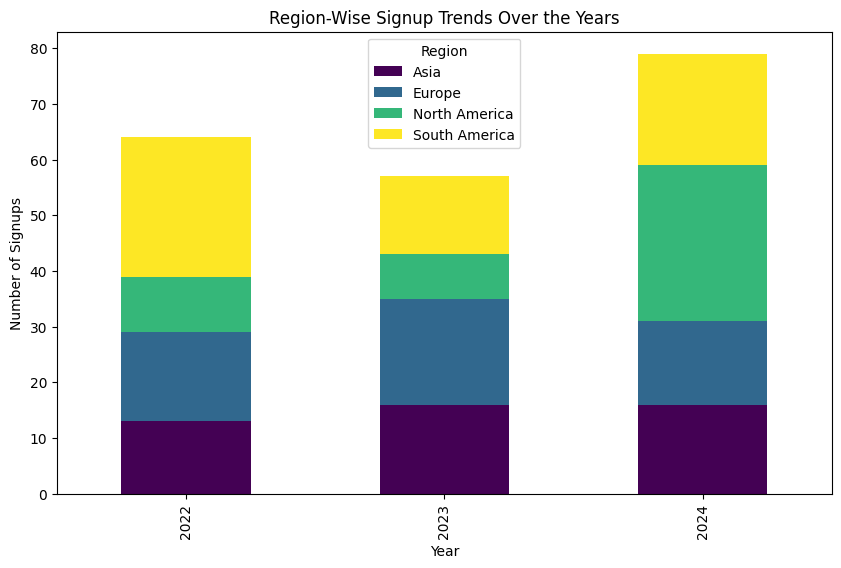

In [44]:
# Group by 'Region' and 'SignupYear' to analyze signups region-wise over the years
region_yearly_signups = customers.groupby(['Region', 'SignupYear']).size().unstack(fill_value=0)

# Display the region-wise yearly signup trends
print("\nRegion-wise signup trends over the years (rows=regions, columns=years):")
print(region_yearly_signups)

# Plot the trends using a stacked bar chart
region_yearly_signups.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Region-Wise Signup Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.legend(title='Region')
plt.show()



Signups by Day of the Week:
SignupDay
Sunday       33
Saturday     33
Wednesday    29
Monday       28
Thursday     26
Tuesday      26
Friday       25
Name: count, dtype: int64


C:\Users\kumar\AppData\Local\Temp\ipykernel_23036\2802690327.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_signups.index, y=day_of_week_signups.values, palette='coolwarm')


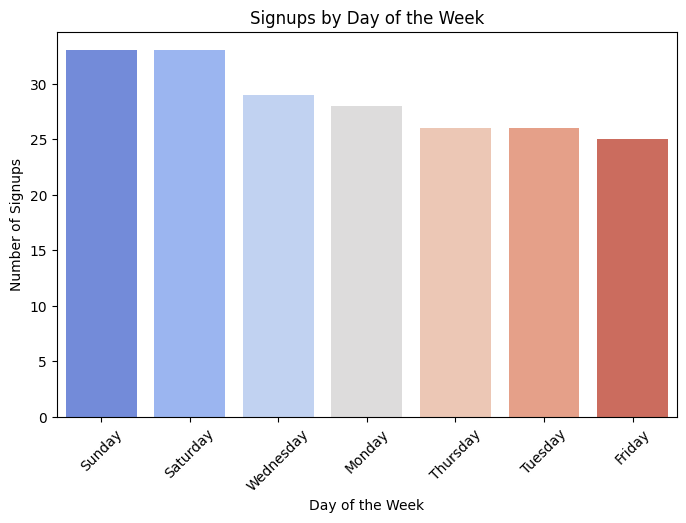

In [45]:
# Create a column for the day of the week (e.g., Monday, Tuesday)
customers['SignupDay'] = customers['SignupDate'].dt.day_name()

# Calculate the frequency of signups by the day of the week
day_of_week_signups = customers['SignupDay'].value_counts()

# Display the signup frequency by the day of the week
print("\nSignups by Day of the Week:")
print(day_of_week_signups)

# Plot the signup frequency using a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=day_of_week_signups.index, y=day_of_week_signups.values, palette='coolwarm')
plt.title('Signups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()
